In [2]:
# Author: Hassan Ali

# Mounting Google Drive to your Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Author: Hassan Ali
# Coding Activity 9

# Task 1 Perceptron

# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/A9/sonar.all-data')


# Separating features from the target variable
# 'X' contains all columns except the last one (features).
X = df.iloc[:, :59]
# 'y' contains the last column of the dataset (target variable).
y = df.iloc[:, 60]

# Spliting the dataset into training and testing subsets. 80:20
# The random_state parameter ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Initializing a Perceptron model with specified hyperparameters:
# random_state ensures consistent results across runs.
# max_iter sets the maximum number of iterations (epochs) for the algorithm.
# tol defines the tolerance for stopping criteria (how small the improvement must be to continue training).
perceptron = Perceptron(random_state=1, max_iter=50, tol=0.005)

# Training Perceptron model with training data.
perceptron.fit(X_train, y_train)

# Making predictions on training data using the trained model.
yhat_train_perceptron = perceptron.predict(X_train)
# Making predictions on the test data using the trained model.
yhat_test_perceptron = perceptron.predict(X_test)

# Calculating and displaying accuracy of the model on the training set.
# accuracy_score compares the true labels with the predicted labels.
print("Perceptron: Accuracy for training is %.2f" % (accuracy_score(y_train, yhat_train_perceptron)))

# Calculating and displaying the accuracy of the model on the testing set.
print("Perceptron: Accuracy for testing is %.2f" % (accuracy_score(y_test, yhat_test_perceptron)))

Perceptron: Accuracy for training is 0.86
Perceptron: Accuracy for testing is 0.79


In [4]:
# Task 2 MLP

import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Loading and partitioning dataset
df = pd.read_csv('/content/drive/MyDrive/A9/sonar.all-data')

X = df.iloc[:, :59]
y = df.iloc[:, 60]

# Splitting dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

# Building MLP network
mlp = MLPClassifier(solver='sgd', max_iter=50, verbose=True, random_state=1,
                    learning_rate_init=.1, hidden_layer_sizes=(60, 100, 2))
mlp.fit(X_train, y_train)

# Making predictions with new classifier
yhat_train_mlp = mlp.predict(X_train)
yhat_test_mlp = mlp.predict(X_test)

print("Multilayer Perceptron: Accuracy for training is %.2f" % (accuracy_score(y_train, yhat_train_mlp)))
print("Multilayer Perceptron: Accuracy for testing is %.2f" % (accuracy_score(y_test, yhat_test_mlp)))

Iteration 1, loss = 0.72570072
Iteration 2, loss = 0.68829114
Iteration 3, loss = 0.67628795
Iteration 4, loss = 0.67551048
Iteration 5, loss = 0.66996642
Iteration 6, loss = 0.66168835
Iteration 7, loss = 0.65443560
Iteration 8, loss = 0.64790363
Iteration 9, loss = 0.64146313
Iteration 10, loss = 0.63370970
Iteration 11, loss = 0.62516367
Iteration 12, loss = 0.61631131
Iteration 13, loss = 0.60628359
Iteration 14, loss = 0.59495276
Iteration 15, loss = 0.58263839
Iteration 16, loss = 0.56913810
Iteration 17, loss = 0.55416237
Iteration 18, loss = 0.53784508
Iteration 19, loss = 0.52022845
Iteration 20, loss = 0.50239569
Iteration 21, loss = 0.48743186
Iteration 22, loss = 0.50736534
Iteration 23, loss = 0.85440407
Iteration 24, loss = 1.23389428
Iteration 25, loss = 0.79052112
Iteration 26, loss = 0.67382288
Iteration 27, loss = 0.65242827
Iteration 28, loss = 0.65048390
Iteration 29, loss = 0.63333970
Iteration 30, loss = 0.59228047
Iteration 31, loss = 0.56928599
Iteration 32, los

In [5]:
#Task 3 Multilayer Perceptron

# Importing necessary libraries.
import urllib.request
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Loading diabetes dataset (built into scikit-learn)
# `data.data` contains the features (X), and `data.target` contains the target values (y).
data = load_diabetes()
X, y = data.data, data.target

# Printing the shape of the feature matrix (X) to verify the dataset's size.
print(X.shape)

# Standardizing the features using StandardScaler.
# This ensures all features have a mean of 0 and a standard deviation of 1, which improves neural network performance.
data_scaled = StandardScaler().fit_transform(X)

# Spliting dataset for training and testing. 75:25
# 75% of the data is used for training, and 25% is used for testing.
# `random_state=1` ensures the split is reproducible across different runs.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Initializing and train the MLPRegressor (Multilayer Perceptron for regression).
# `hidden_layer_sizes=(3,5)` specifies two hidden layers with 3 neurons in the first and 5 in the second.
# `random_state=1` ensures reproducibility of results.
regr = MLPRegressor(hidden_layer_sizes=(3, 5), random_state=1).fit(X_train, y_train)

# Usinb the trained model to make a prediction for a specific test sample.
# The input to `predict` is the third sample (index 2) from the test dataset.
prediction_result = regr.predict(X_test[2:3, :])

# Print the predicted value for the selected test sample.
print(prediction_result)

# Calculate the R^2 score (a measure of model performance) on the test dataset.
# R^2 score is then divided by the number of test samples for demonstration purposes (though this isn't standard practice).
error = regr.score(X_test, y_test) / len(y_test)

# Print the calculated error metric.
print(error)

(442, 10)
[2.72313482]
-0.03623168451597208


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
# Task 4 MLPRegressor 2

# Importing libraries
import urllib.request
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Loading diabetes dataset (includes features and target values)
data = load_diabetes()
# Extracting feature matrix (X) and target vector (y) from the dataset.
X, y = data.data, data.target

# Printing the shape of the feature matrix to confirm the number of samples and features.
# For the diabetes dataset, X typically has 442 samples with 10 features each.
print(X.shape)

# Standardizing the features in X using StandardScaler to ensure that each feature has a mean of 0 and a standard deviation of 1.
# This helps improve the performance and convergence of many machine learning algorithms.
data_scaled = StandardScaler().fit_transform(X)

# Split the dataset into training and testing subsets. 75:25
# The random_state ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Initializing an MLPRegressor model for regression tasks.
# hidden_layer_sizes=(3, 5): The model has two hidden layers with 3 neurons in the first layer and 5 neurons in the second layer.
# random_state=1: Ensures reproducibility of the results.
regr = MLPRegressor(hidden_layer_sizes=(3, 5), random_state=1).fit(X_train, y_train)

# Making a prediction using the trained model for the third sample in the test dataset (index 2).
prediction_result = regr.predict(X_test[2:3, :])

# Printing the predicted value for the third test sample.
print(prediction_result)

# Calculating the model's R^2 score on the testing dataset (a measure of how well the model predicts).
# Divide the R^2 score by the number of samples in the test set for demonstration purposes (though this operation may not be standard).
error = regr.score(X_test, y_test) / len(y_test)

# Printing the computed error metric (R^2 score divided by the test set size).
print(error)


(442, 10)
[2.72313482]
-0.03623168451597208


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape: (60000, 784)
Test data shape: (10000, 784)
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.4975 - val_loss: 0.3403
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.3320 - val_loss: 0.3190
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.3135 - val_loss: 0.3086
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.3048 - val_loss: 0.3010
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2971 - val_loss: 0.2957
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2927 - val_loss: 0.2923
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2898 - val_loss: 0.2903
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.2875 - val_loss: 0.2893
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step -

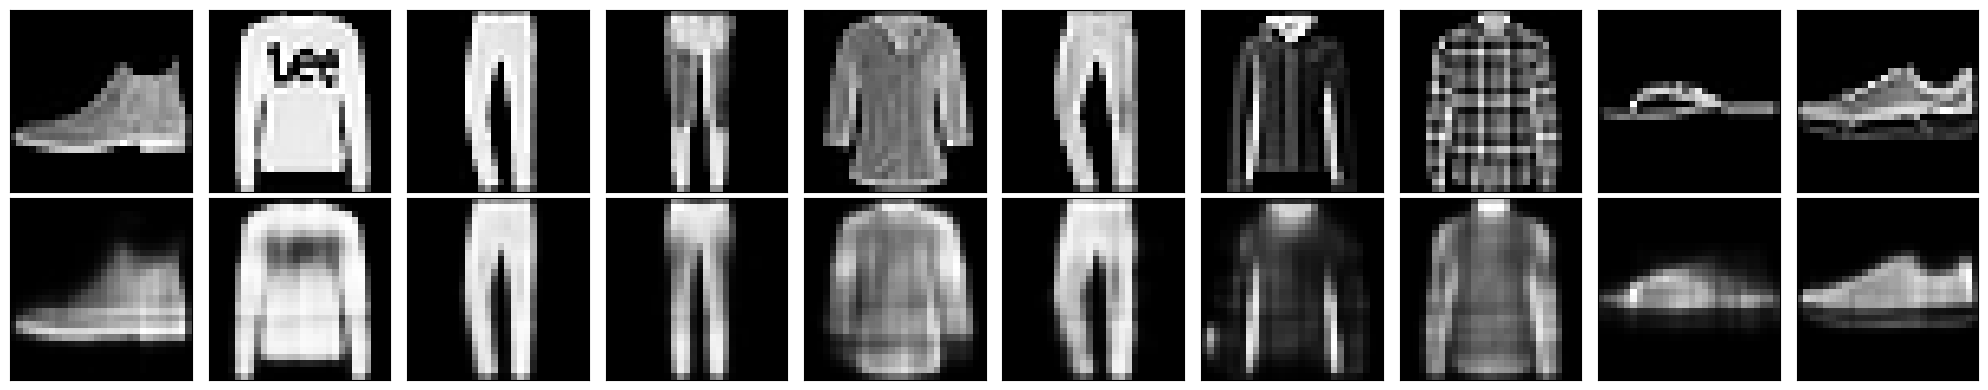

In [7]:
# Problem 5.1 (Autoencoder)
# Dataset: Fashion MNIST
# Goal: Build an autoencoder to compress and reconstruct images from the Fashion MNIST dataset.
#       The autoencoder learns a 32-dimensional encoded representation.
#       After training, the model reconstructs test images, which are displayed side by side with the originals.
#
# This code follows the structure, layout, methodology, and style of the reference notebooks.

# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Defining the encoding dimension (compression level)
encoding_dim = 32  # The encoded representation will have 32 dimensions

# STEP 1: Define the Autoencoder Architecture
# Define the input layer. Each image (28x28) is flattened into a vector of 784 pixels.
input_img = tf.keras.Input(shape=(784,))

# Define the encoding layer using tf.keras.layers.Dense
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)

# Define the decoding layer that reconstructs the input from the encoded representation.
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# Build the autoencoder model: mapping input_img to decoded output.
autoencoder = tf.keras.Model(input_img, decoded)

# Create a separate encoder model to map inputs to their encoded representations.
encoder = tf.keras.Model(input_img, encoded)

# Create the decoder model.
encoded_input = tf.keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]  # Retrieve the decoding layer from the autoencoder
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

# STEP 2: Compile the Autoencoder
# Use the Adam optimizer and binary cross-entropy loss since pixel values are normalized between 0 and 1.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# STEP 3: Load and Preprocess the Fashion MNIST Dataset
# Load the dataset (labels are not needed for this unsupervised task)
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images from 28x28 to 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Print the shapes of the training and testing datasets for verification
print("Training data shape:", x_train.shape)  # Expected: (60000, 784)
print("Test data shape:", x_test.shape)        # Expected: (10000, 784)

# STEP 4: Train the Autoencoder
# Train for 50 epochs with a batch size of 256, shuffling the data at each epoch.
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# STEP 5: Encode and Decode the Test Data
# Encode the test images into their compressed representations.
encoded_imgs = encoder.predict(x_test)
# Decode the encoded images to reconstruct the original images.
decoded_imgs = decoder.predict(encoded_imgs)

# STEP 6: Visualize the Original and Reconstructed Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original image.
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed image.
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 129ms/step - accuracy: 0.7799 - loss: 0.7247 - val_accuracy: 0.9773 - val_loss: 0.0816
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 77s 116ms/step - accuracy: 0.9635 - loss: 0.1224 - val_accuracy: 0.9840 - val_loss: 0.0606
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 75s 101ms/step - accuracy: 0.9717 - loss: 0.0920 - val_accuracy: 0.9867 - val_loss: 0.0491
Test loss: 0.04618644714355469
Test accuracy: 0.9857000112533569


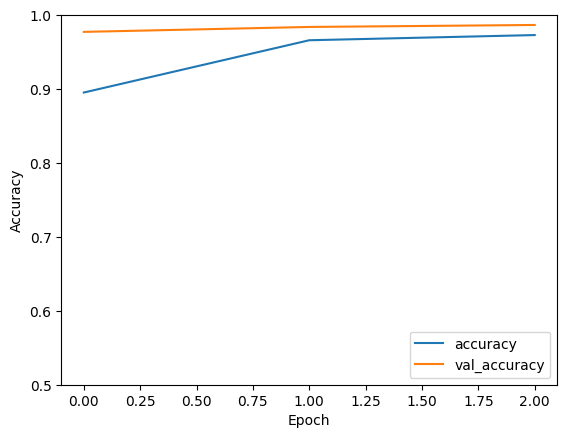

313/313 - 4s - 14ms/step - accuracy: 0.9857 - loss: 0.0462


In [8]:
#Task 6 CNN

# Importing necessary libraries.
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt

# Defining model and data parameters.
num_classes = 10  # The number of output classes (digits 0-9 for MNIST).
input_shape = (28, 28, 1)  # Shape of the input images (28x28 pixels, grayscale with a single channel).

# Load and split the MNIST dataset into training and testing sets.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the image pixel values to the range [0, 1] by dividing by 255.
# This improves the convergence of the neural network.
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Add a channel dimension to the images to make them compatible with the CNN input shape.
# The new shape will be (28, 28, 1) for grayscale images.
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert the class labels into one-hot encoded format.
# This is required for categorical classification with `categorical_crossentropy` loss.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build a Convolutional Neural Network (CNN) model.
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),  # Input layer specifying the shape of input images.
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),  # Convolutional layer with 32 filters of size 3x3.
        layers.MaxPooling2D(pool_size=(2, 2)),  # Max pooling layer to reduce spatial dimensions by 2x2.
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),  # Second convolutional layer with 64 filters of size 3x3.
        layers.MaxPooling2D(pool_size=(2, 2)),  # Second max pooling layer to further reduce spatial dimensions.
        layers.Flatten(),  # Flatten the feature maps into a 1D vector for the dense layer.
        layers.Dropout(0.5),  # Dropout layer with 50% probability to reduce overfitting.
        layers.Dense(num_classes, activation="softmax"),  # Fully connected layer with 10 output units and softmax activation for classification.
    ]
)

# Define training parameters.
batch_size = 128  # Number of samples per gradient update.
epochs = 3  # Number of passes through the entire training dataset.

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy as the metric.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model on the training data and validate it on 10% of the training data.
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Evaluate the trained model on the test dataset.
# `verbose=0` suppresses the detailed output during evaluation.
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])  # Print the loss on the test dataset.
print("Test accuracy:", score[1])  # Print the accuracy on the test dataset.

# Plot training and validation accuracy over epochs.
plt.plot(history.history['accuracy'], label='accuracy')  # Training accuracy.
plt.plot(history.history['val_accuracy'], label='val_accuracy')  # Validation accuracy.
plt.xlabel('Epoch')  # Label for the x-axis.
plt.ylabel('Accuracy')  # Label for the y-axis.
plt.ylim([0.5, 1])  # Set limits for the y-axis.
plt.legend(loc='lower right')  # Add a legend to the plot.
plt.show()  # Display the plot.

# Evaluate the final model on the test dataset with detailed output.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [9]:
#Task 7 RNN

# Importing libraries.
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.utils import to_categorical
from keras.datasets import mnist

# Loading MNIST dataset.
# `x_train` and `x_test` contain the images, and `y_train` and `y_test` contain the labels.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Determining number of unique labels (digits 0-9).
num_labels = len(np.unique(y_train))  # `num_labels` = 10 for MNIST.

# Converting labels into one-hot encoded vectors.
y_train = to_categorical(y_train, num_classes=num_labels)
y_test = to_categorical(y_test, num_classes=num_labels)

# Getting size of each image (28x28 for MNIST).
image_size = x_train.shape[1]  # `image_size` = 28.

# Reshaping data to fit the input requirements of an RNN.
# Each image is represented as 28 time steps with 28 features per step.
x_train = np.reshape(x_train, [-1, image_size, image_size])  # Reshape to (num_samples, 28, 28).
x_test = np.reshape(x_test, [-1, image_size, image_size])  # Reshape to (num_samples, 28, 28).

# Normalizing the pixel values to the range [0, 1].
x_train = x_train.astype('float32') / 255  # Convert to float32 and scale.
x_test = x_test.astype('float32') / 255  # Convert to float32 and scale.

# Settnig model parameters.
input_shape = (image_size, image_size)  # Shape of the input to the RNN: 28 time steps, 28 features.
batch_size = 128  # Number of samples per training batch.
units = 256  # Number of units (neurons) in the RNN layer.
dropout = 0.2  # Dropout rate to prevent overfitting.

# Building RNN model.
model = Sequential()  # Initialize a sequential model.
model.add(SimpleRNN(units=units,  # Add an RNN layer with 256 units.
                    dropout=dropout,  # Apply dropout with a rate of 20%.
                    input_shape=input_shape))  # Input shape is (28 time steps, 28 features).
model.add(Dense(num_labels))  # Add a dense (fully connected) layer with 10 units (one per class).
model.add(Activation('softmax'))  # Use softmax activation for multiclass classification.

# Compiling the model with categorical crossentropy loss, Adam optimizer, and accuracy metric.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model on the training data for 5 epochs with a batch size of 128.
model.fit(x_train, y_train, epochs=5, batch_size=batch_size)

# Evaluating the model on the test data.
_, acc = model.evaluate(x_test,  # Test images.
                        y_test,  # Test labels.
                        batch_size=batch_size,  # Batch size for evaluation.
                        verbose=0)  # Suppress output during evaluation.

# Printing the accuracy on the test set.
print("\nTest accuracy: %.1f%%" % (100.0 * acc))  # Convert accuracy to percentage.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 66ms/step - accuracy: 0.7913 - loss: 0.6561
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.9281 - loss: 0.2385
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.9451 - loss: 0.1810
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 55ms/step - accuracy: 0.9526 - loss: 0.1594
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 57ms/step - accuracy: 0.9540 - loss: 0.1531

Test accuracy: 96.7%


In [10]:
#Task 8 LSTM

# Importing necessary libraries
import tensorflow as tf
import keras
from keras import layers
from keras import Model

# Loading CIFAR-10 dataset, which consists of 60,000 32x32 RGB images in 10 classes.
cifar10 = tf.keras.datasets.cifar10
(training_images, training_labels), (test_images, test_labels) = cifar10.load_data()

# Reshaping training images into sequences of 1024 time steps with 3 features each (flattening the 32x32 RGB images).
training_images = training_images.reshape(50000, 1024, 3)

# Normalizing pixel values of the training images to the range [0, 1] for better training stability.
training_images = training_images / 255.0

# Reshaping test images into the same format as the training images (1024 time steps with 3 features each).
test_images = test_images.reshape(10000, 1024, 3)

# Normalizing pixel values of the test images to the range [0, 1].
test_images = test_images / 255.0

# Defining LSTM-based sequential model.
model = tf.keras.models.Sequential([
    # First LSTM layer with 32 units, processing the image sequences.
    # return_sequences=True ensures that the output of each time step is passed to the next LSTM layer.
    tf.keras.layers.LSTM(32, input_shape=(1024, 3), return_sequences=True),

    # Second LSTM layer with 32 units, processing the sequence further.
    tf.keras.layers.LSTM(32),

    # Dropout layer with a 25% dropout rate to reduce overfitting.
    tf.keras.layers.Dropout(0.25),

    # Flatten the output of the LSTM layer for dense layer processing.
    tf.keras.layers.Flatten(),

    # Fully connected (dense) layer with 128 units and ReLU activation.
    tf.keras.layers.Dense(128, activation='relu'),

    # Another Dropout layer with a 25% dropout rate to reduce overfitting.
    tf.keras.layers.Dropout(0.25),

    # Fully connected layer with 64 units and ReLU activation.
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 10 units (one per class) and softmax activation for multiclass classification.
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with the Adam optimizer, sparse categorical crossentropy loss, and accuracy metric.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy since labels are integers.
              metrics=["acc"])  # Use accuracy as the evaluation metric.

# Train the model on the training dataset for 20 epochs with a batch size of 50.
model.fit(training_images, training_labels, batch_size=50, epochs=20)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
Epoch 1/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 674s 670ms/step - acc: 0.1661 - loss: 2.2171
Epoch 2/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 669s 669ms/step - acc: 0.1963 - loss: 2.1624
Epoch 3/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 681s 668ms/step - acc: 0.2123 - loss: 2.1313
Epoch 4/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 686s 672ms/step - acc: 0.2171 - loss: 2.1280
Epoch 5/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 685s 675ms/step - acc: 0.2103 - loss: 2.1347
Epoch 6/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 683s 676ms/step - acc: 0.2249 - loss: 2.1144
Epoch 7/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 682s 676ms/step - acc: 0.2263 - loss: 2.1174
Epoch 8/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 671s 671ms/step - acc: 0.2318 - loss: 2.0992
Epoch 9/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 688s 677ms/step - acc: 0.2378 - loss: 2.0931
Epoch 10/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 682s 678ms/step - acc: 0.2406 - loss: 2.0832
Epoch 11/20
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 677s 677ms/step - acc: 0.2381 - 